<a href="https://colab.research.google.com/github/123Sahib321/ML-Noida-2019-June-One/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np



In [0]:
X, y = make_circles(1000, factor=.3, noise =.1)

In [0]:
ohe = OneHotEncoder(categories="auto")


In [0]:

data = pd.read_csv("sample_data/mnist_train_small.csv").values
data = np.array(data)

In [0]:
A = data[:,1:]
b = data[:,0]

In [0]:
A_train, A_test, b_train, b_test = train_test_split(
...     A, b, test_size=0.33, random_state=42)

In [0]:
b_hot = ohe.fit_transform(b.reshape(-1,1)).todense()

In [0]:
A_train, A_test, b_train, b_test = train_test_split(
...     A, b_hot, test_size=0.33, random_state=42)

In [0]:
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [45]:
ohe.categories_

[array([0, 1])]

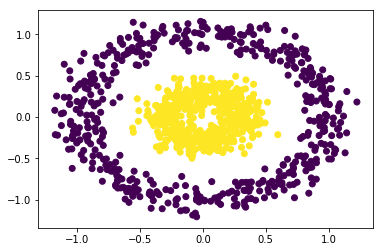

In [46]:
plt.scatter(X[:,0],X[:,1] ,c = y)

In [94]:
model = Sequential()
layer_1 = Dense(4 , activation = "relu",input_shape = [2])
layer_2 = Dense(2 , activation = "softmax")
model.add(layer_1)
model.add(layer_2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy" ,metrics = ["accuracy"])


In [96]:
model.fit(X_train , y_train,epochs = 40 , batch_size = 30)


Epoch 1/40
670/670 [==============================] - 0s 346us/step - loss: 0.8168 - acc: 0.4806
Epoch 2/40
670/670 [==============================] - 0s 44us/step - loss: 0.7993 - acc: 0.3373
Epoch 3/40
670/670 [==============================] - 0s 44us/step - loss: 0.7851 - acc: 0.3537
Epoch 4/40
670/670 [==============================] - 0s 44us/step - loss: 0.7724 - acc: 0.4119
Epoch 5/40
670/670 [==============================] - 0s 51us/step - loss: 0.7620 - acc: 0.4433
Epoch 6/40
670/670 [==============================] - 0s 43us/step - loss: 0.7525 - acc: 0.4313
Epoch 7/40
670/670 [==============================] - 0s 48us/step - loss: 0.7441 - acc: 0.4239
Epoch 8/40
670/670 [==============================] - 0s 50us/step - loss: 0.7361 - acc: 0.4149
Epoch 9/40
670/670 [==============================] - 0s 44us/step - loss: 0.7285 - acc: 0.4030
Epoch 10/40
670/670 [==============================] - 0s 44us/step - loss: 0.7210 - acc: 0.3940
Epoch 11/40
670/670 [=================

In [97]:
model.evaluate(X_test , y_test)

330/330 [==============================] - 0s 198us/step


[0.4532764839403557, 0.9181818181818182]

In [98]:
model.fit(A_train , b_train,epochs = 40 , batch_size = 30)


ValueError: ignored